In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [18]:
# Load your reference data
reference_data = pd.read_csv('Company_Classification.csv')

# Create mapping dictionaries
# For sectors
unique_sectors = reference_data['Sector'].unique()
sector_mapping = {sector: i+1 for i, sector in enumerate(sorted(unique_sectors))}

# For industries
unique_industries = reference_data['Industry'].unique()
industry_mapping = {industry: i+1 for i, industry in enumerate(sorted(unique_industries))}

print("Sector Mapping:", sector_mapping)
print("Industry Mapping:", industry_mapping)

Sector Mapping: {'Communication Services': 1, 'Consumer Discretionary': 2, 'Consumer Durables': 3, 'Consumer Staples': 4, 'Energy': 5, 'Financials': 6, 'Health Care': 7, 'Industrials': 8, 'Information Technology': 9, 'Materials': 10, 'Real Estate': 11, 'Utilities': 12}
Industry Mapping: {'Abrasive Products': 1, 'Aerospace & Defense': 2, 'Agricultural Machinery': 3, 'Air Freight & Logistics': 4, 'Airlines': 5, 'Aluminum': 6, 'Apparel & Accessories': 7, 'Apparel & Textiles': 8, 'Apparel Retail': 9, 'Asset Management': 10, 'Auto Parts & Equipment': 11, 'Automobile Components': 12, 'Automobile Manufacturers': 13, 'Automobiles': 14, 'Banks': 15, 'Beverages': 16, 'Broadcasting': 17, 'Building Products': 18, 'Capital Markets': 19, 'Chemicals': 20, 'Coal & Consumable Fuels': 21, 'Commercial Services & Supplies': 22, 'Communication Equipment': 23, 'Communications Equipment': 24, 'Construction & Engineering': 25, 'Construction Materials': 26, 'Consumer Durables': 27, 'Consumer Electronics': 28, 

In [19]:
# Load panel data
panel_data = pd.read_csv('FidelFolio_Dataset.csv')

# Merge with reference data to get sector/industry names
# Assuming 'CompanyID' is the common column
merged_data = pd.merge(panel_data,
                      reference_data[['Company', 'Sector', 'Industry']],
                      on='Company',
                      how='left')

# Create numeric codes using the mappings
merged_data['sector_code'] = merged_data['Sector'].map(sector_mapping)
merged_data['industry_code'] = merged_data['Industry'].map(industry_mapping)

# Drop the temporary name columns if you don't need them
merged_data = merged_data.drop(['Sector', 'Industry'], axis=1)

In [20]:
df = merged_data
df.head()

,Year,Company,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature24,Feature25,Feature26,Feature27,Feature28,Target 1,Target 2,Target 3,sector_code,industry_code
0,1999,Hind. Unilever,15.0,65.87,54.57,41.12,45.82,123.34,0.65,33131.93,...,1222.04,1120.99,1091.71,1956.94,264.31,5.38,29.08,42.37,4.0,62.0
1,1999,ITC,66.0,35.77,32.29,37.91,36.37,-269.26,0.57,23632.98,...,1249.28,1146.99,938.03,3486.42,1252.22,-67.4,-23.41,-33.87,4.0,121.0
2,1999,Wipro,79.0,31.40,46.55,164.42,74.72,348.29,1.61,18438.55,...,218.26,153.73,118.14,828.14,281.07,538.95,60.23,108.3,9.0,63.0
3,1999,O N G C,37.0,13.78,11.82,6.12,3.23,6.02,1.19,16868.75,...,5100.39,4404.90,3574.50,32398.94,8150.14,-29.06,4.07,124.85,5.0,87.0
4,1999,Lila Worldwide,NaN,0.16,0.14,"5,715.31",-4.41,NaN,"-1,094.90",14916.95,...,4.77,3.09,2.91,3590.57,NaN,150.06,598.24,"1,057.39",2.0,30.0


In [21]:
df.loc[df['sector_code'].isna(), 'sector_code'] = 'Consumer Durables'
df.loc[df['industry_code'].isna(), 'industry_code'] = 'Entertainment'

<ipython-input-21-d62e0f89e5b7>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Consumer Durables' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['sector_code'].isna(), 'sector_code'] = 'Consumer Durables'
<ipython-input-21-d62e0f89e5b7>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Entertainment' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['industry_code'].isna(), 'industry_code'] = 'Entertainment'


In [22]:
# Define your feature and target columns
feature_cols = [f'Feature{i}' for i in range(1, 29)]
target_cols = [col for col in df.columns if 'Target' in col]

# Remove commas from feature and target columns
for col in feature_cols + target_cols:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)

# Convert to numeric (after commas are removed)
df[feature_cols + target_cols] = df[feature_cols + target_cols].apply(pd.to_numeric, errors='coerce')


In [23]:
# List of feature columns
feature_cols = [f'Feature{i}' for i in range(1, 29)]

# Create a temporary DataFrame to store 'HasData' without modifying df
temp_df = df.copy()
temp_df['HasData'] = temp_df[feature_cols].notna().any(axis=1)

# Filter only rows where there is valid data
valid_data = temp_df[temp_df['HasData']]

# Group by company and calculate min and max year
company_year_ranges = valid_data.groupby('Company')['Year'].agg(['min', 'max']).reset_index()

# Rename columns for clarity
company_year_ranges.columns = ['Company', 'Start_Year', 'End_Year']

# Display result
print(company_year_ranges)

               Company  Start_Year  End_Year
0              360 ONE        2020      2024
1             3M India        1999      2024
2          3i Infotech        2006      2022
3      52 Weeks Enter.        2016      2017
4       5Paisa Capital        2020      2024
...                ...         ...       ...
2791    Zydus Wellness        2009      2024
2792     Zylog Systems        2008      2013
2793   eClerx Services        2008      2024
2794  eDynamics Solut.        2014      2014
2795           eMudhra        2023      2024

[2796 rows x 3 columns]


In [28]:
df = df.drop(columns=['industry_code','Feature13', 'Feature23', 'Feature24', 'Feature25', 'Feature26', 'Feature27'])
df.to_csv('Before_null.csv')

In [29]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Step 1: Load and preprocess the data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)


    # Extract features and target
    feature_cols = [col for col in df.columns if col.startswith('Feature')]
    features = df[feature_cols]
    target = df[' Target 1 ']

    # Keep track of metadata
    metadata = df[['Year', 'Company', 'sector_code']]

    return df, features, target, metadata, feature_cols

# Step 2: Define the VAE architecture
class SectorAwareVAE(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, latent_dim=32, n_sectors=None):
        super(SectorAwareVAE, self).__init__()

        self.n_sectors = n_sectors

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )

        # If we have sector information, add sector-specific encoding layers
        if n_sectors:
            self.sector_encoders = nn.ModuleList([
                nn.Sequential(
                    nn.Linear(hidden_dim, hidden_dim // 2),
                    nn.ReLU()
                ) for _ in range(n_sectors)
            ])

            self.mu_layers = nn.ModuleList([
                nn.Linear(hidden_dim // 2, latent_dim) for _ in range(n_sectors)
            ])

            self.logvar_layers = nn.ModuleList([
                nn.Linear(hidden_dim // 2, latent_dim) for _ in range(n_sectors)
            ])

            # Sector-specific decoders
            self.sector_decoders = nn.ModuleList([
                nn.Sequential(
                    nn.Linear(latent_dim, hidden_dim // 2),
                    nn.ReLU()
                ) for _ in range(n_sectors)
            ])

            # Shared final decoder
            self.final_decoder = nn.Sequential(
                nn.Linear(hidden_dim // 2, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, input_dim)
            )
        else:
            # Standard VAE without sector awareness
            self.mu_layer = nn.Linear(hidden_dim, latent_dim)
            self.logvar_layer = nn.Linear(hidden_dim, latent_dim)

            # Decoder
            self.decoder = nn.Sequential(
                nn.Linear(latent_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, input_dim)
            )

    def encode(self, x, sector_idx=None):
        h = self.encoder(x)

        if self.n_sectors and sector_idx is not None:
            # Use sector-specific encoders if we have sector information
            h_sector = self.sector_encoders[sector_idx](h)
            mu = self.mu_layers[sector_idx](h_sector)
            logvar = self.logvar_layers[sector_idx](h_sector)
        else:
            mu = self.mu_layer(h)
            logvar = self.logvar_layer(h)

        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z, sector_idx=None):
        if self.n_sectors and sector_idx is not None:
            # Use sector-specific decoders
            h = self.sector_decoders[sector_idx](z)
            return self.final_decoder(h)
        else:
            return self.decoder(z)

    def forward(self, x, sector_idx=None):
        mu, logvar = self.encode(x, sector_idx)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, sector_idx), mu, logvar


# Step 3: Train the VAE with sector awareness
def train_vae(df, features, feature_cols, metadata, epochs=100, batch_size=64, learning_rate=1e-3):
    # Get unique sectors and create a mapping
    sectors = metadata['sector_code'].unique()
    sector_to_idx = {sector: idx for idx, sector in enumerate(sectors)}

    # Convert features to numpy and replace NaN with 0 temporarily for scaling
    feature_array = features.fillna(0).values

    # Scale features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(feature_array)

    # Create mask for missing values (1 for observed, 0 for missing)
    mask = ~np.isnan(features.values)

    # Convert to PyTorch tensors
    X = torch.FloatTensor(scaled_features)
    mask_tensor = torch.FloatTensor(mask)

    # Get sector indices
    sector_indices = metadata['sector_code'].map(sector_to_idx).values
    sector_indices_tensor = torch.LongTensor(sector_indices)

    # Create DataLoader
    dataset = TensorDataset(X, mask_tensor, sector_indices_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Initialize VAE
    input_dim = features.shape[1]
    model = SectorAwareVAE(input_dim, n_sectors=len(sectors))
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_mask, batch_sectors in dataloader:
            batch_loss = 0

            # Process each sector separately
            for sector_idx in range(len(sectors)):
                # Get data for this sector
                sector_mask = (batch_sectors == sector_idx)
                if not sector_mask.any():
                    continue

                X_sector = batch_X[sector_mask]
                mask_sector = batch_mask[sector_mask]

                # Forward pass
                reconstructed, mu, logvar = model(X_sector, sector_idx)

                # Compute loss - only for observed values
                # Reconstruction loss (MSE)
                recon_loss = F.mse_loss(reconstructed * mask_sector, X_sector * mask_sector, reduction='sum')

                # KL divergence
                kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

                # Total loss
                loss = recon_loss + kl_loss
                batch_loss += loss

            # Backward pass and optimize
            optimizer.zero_grad()
            batch_loss.backward()
            optimizer.step()

            total_loss += batch_loss.item()

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(dataloader):.4f}')

    return model, scaler, sector_to_idx


# Step 4: Implement sector-aware, time-aware imputation
# Fix for the impute_missing_values function to correct the index error

def impute_missing_values(df, model, scaler, sector_to_idx, feature_cols):
    """
    Impute missing values using the trained VAE model with sector awareness.
    Fixes the index calculation issue in the original code.
    """
    # Sort by company and year to ensure time order
    df_sorted = df.sort_values(['Company', 'Year'])

    # Create a copy of the dataframe for imputation
    df_imputed = df_sorted.copy()

    # Process each company separately
    for company in df_sorted['Company'].unique():
        company_data = df_sorted[df_sorted['Company'] == company].copy()
        years = sorted(company_data['Year'].unique())  # Get sorted unique years
        company_sector = company_data['sector_code'].iloc[0]
        sector_idx = sector_to_idx[company_sector]

        # Process each year chronologically
        for year_idx, year in enumerate(years):
            year_data = company_data[company_data['Year'] == year]

            # Check if there are missing values for this company-year
            if year_data[feature_cols].isna().any().any():
                # Use only past data (up to current year) for this company
                past_data = company_data[company_data['Year'] <= year].copy()

                # Reset index to avoid indexing issues
                past_data = past_data.reset_index(drop=True)

                # Get features with missing values in current year
                missing_cols = [col for col in feature_cols if year_data[col].isna().any()]

                # If it's the first year with missing data, use sector average
                if year_idx == 0 or len(past_data) == 1:
                    # Find companies in the same sector
                    sector_companies = df_sorted[df_sorted['sector_code'] == company_sector]

                    # For the first year, use sector average for the same year
                    sector_year_data = sector_companies[sector_companies['Year'] == year]

                    for col in missing_cols:
                        if not sector_year_data[col].isna().all():
                            # Use mean of available values for this column in this sector and year
                            fill_value = sector_year_data[col].mean()
                            df_imputed.loc[(df_imputed['Company'] == company) &
                                          (df_imputed['Year'] == year), col] = fill_value
                        else:
                            # If no data available for this sector and year, use all sector data
                            # from previous years
                            sector_prev_years = sector_companies[sector_companies['Year'] < year]
                            if not sector_prev_years.empty and not sector_prev_years[col].isna().all():
                                fill_value = sector_prev_years[col].mean()
                                df_imputed.loc[(df_imputed['Company'] == company) &
                                              (df_imputed['Year'] == year), col] = fill_value
                else:
                    # Prepare data for imputation
                    X = past_data[feature_cols].fillna(0).values
                    X_scaled = scaler.transform(X)
                    X_tensor = torch.FloatTensor(X_scaled)

                    # Get reconstructed values
                    model.eval()
                    with torch.no_grad():
                        reconstructed, _, _ = model(X_tensor, sector_idx)
                        reconstructed = reconstructed.numpy()

                    # Find the index of the current year in the reconstructed data
                    # This is the critical fix - we find the last row which corresponds to current year
                    current_year_rows = past_data['Year'] == year
                    if not current_year_rows.any():
                        continue  # Skip if no rows for current year (shouldn't happen but safety check)

                    # Get the last row index for the current year
                    current_year_idx = current_year_rows.values.nonzero()[0][-1]

                    # Check if index is valid
                    if current_year_idx >= len(reconstructed):
                        print(f"Warning: Index calculation issue for {company}, year {year}. Skipping.")
                        continue

                    reconstructed_current = reconstructed[current_year_idx]

                    # Inverse transform to get original scale
                    reconstructed_orig = scaler.inverse_transform(reconstructed)
                    reconstructed_current_orig = reconstructed_orig[current_year_idx]

                    # Fill missing values only
                    for i, col in enumerate(feature_cols):
                        if col in missing_cols:
                            df_imputed.loc[(df_imputed['Company'] == company) &
                                          (df_imputed['Year'] == year), col] = reconstructed_current_orig[i]

    return df_imputed

In [30]:
df, features, target, metadata, feature_cols = load_and_preprocess_data("Before_null.csv")
model, scaler, sector_to_idx = train_vae(df, features, feature_cols, metadata, epochs=150)

Epoch 10/150, Loss: 831.7292
Epoch 20/150, Loss: 768.2502
Epoch 30/150, Loss: 659.1183
Epoch 40/150, Loss: 598.0699
Epoch 50/150, Loss: 584.5894
Epoch 60/150, Loss: 537.2635
Epoch 70/150, Loss: 505.3880
Epoch 80/150, Loss: 452.7514
Epoch 90/150, Loss: 459.2715
Epoch 100/150, Loss: 445.1896
Epoch 110/150, Loss: 425.3270
Epoch 120/150, Loss: 408.8135
Epoch 130/150, Loss: 412.7343
Epoch 140/150, Loss: 421.8245
Epoch 150/150, Loss: 359.2733


In [31]:
df_imputed = impute_missing_values(df, model, scaler, sector_to_idx, feature_cols)
df = df_imputed

In [32]:
df.rename(columns={'target_market_cap_growth': 'Target 1',}, inplace=True)

# Identify the row where Feature9 is missing
nan_row = df[df['Feature9'].isnull()].iloc[0]
nan_row

,6491
Unnamed: 0,6491
Year,2007
Company,Blue Bird (I)
Feature1,105.0
Feature2,24.14
Feature3,23.03
Feature4,8.05
Feature5,-2.55
Feature6,-1.99
Feature7,-1.47


In [33]:
df = df[df['Company'] != 'Blue Bird (I)'].reset_index(drop=True)

In [34]:
from sklearn.preprocessing import StandardScaler

def z_score_normalize(df, feature_cols=None, sector_column='sector_code'):
    """
    Z-score normalize specified features across each sector.
    Excludes Feature13 and Features22-27 by default.
    """
    # Define excluded features
    excluded_indices = {13, 23, 24, 25, 26, 27}

    # Generate feature columns if not provided
    if feature_cols is None:
        feature_cols = [f'Feature{i}' for i in range(1, 29)
                        if i not in excluded_indices]

    # Verify columns exist in DataFrame
    missing_cols = [col for col in feature_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns not found: {missing_cols}")

    # Initialize scaler
    scaler = StandardScaler()

    # Normalize within each sector group
    for sector in df[sector_column].unique():
        sector_mask = df[sector_column] == sector
        df.loc[sector_mask, feature_cols] = scaler.fit_transform(
            df.loc[sector_mask, feature_cols]
        )

    return df

# Usage
df_normalized = z_score_normalize(df, sector_column='sector_code')
print(df_normalized.head())

   Unnamed: 0  Year  Company  Feature1  Feature2  Feature3  Feature4  \
0       18959  2020  360 ONE -0.025730 -0.386291 -0.421173 -0.062958   
1       20893  2021  360 ONE -0.030814 -0.266381 -0.070393 -0.067283   
2       22046  2022  360 ONE -0.116921  0.065501  0.351499 -0.142967   
3       22474  2023  360 ONE -0.116852  0.060860  0.450697 -0.382306   
4       23731  2024  360 ONE -0.116700  0.148279  0.634154 -0.398291   

   Feature5  Feature6  Feature7  ...  Feature18  Feature19  Feature20  \
0 -0.013804 -0.025585  0.007415  ...  -0.251360  -0.225806  -0.199754   
1 -0.001258 -0.021895 -0.005882  ...  -0.247243  -0.232067  -0.200011   
2  0.535244 -0.075770 -0.003155  ...  -0.234374  -0.224581  -0.199842   
3  0.373997 -0.025904 -0.019264  ...  -0.234841  -0.220817  -0.199986   
4 -0.056433 -0.016513 -0.012616  ...  -0.208201  -0.208281  -0.200123   

   Feature21  Feature22  Feature28   Target 1    Target 2    Target 3   \
0  -0.193106   2.876844  -0.258720      -51.37      -3

In [35]:
# Define feature columns excluding Feature13, Feature22-Feature27
feature_cols = [f'Feature{i}' for i in range(1, 29) if i not in [13, 23, 24, 25, 26, 27]]

# Define target columns
target_cols = [col for col in df_normalized.columns if 'Target' in col]

# Remove commas from feature and target columns
for col in feature_cols + target_cols:
    df_normalized[col] = df_normalized[col].astype(str).str.replace(',', '', regex=False)

# Convert to numeric
df_normalized[feature_cols + target_cols] = df_normalized[feature_cols + target_cols].apply(pd.to_numeric, errors='coerce')

df_normalized['sector_code'] = pd.to_numeric(df_normalized['sector_code'], errors='coerce')

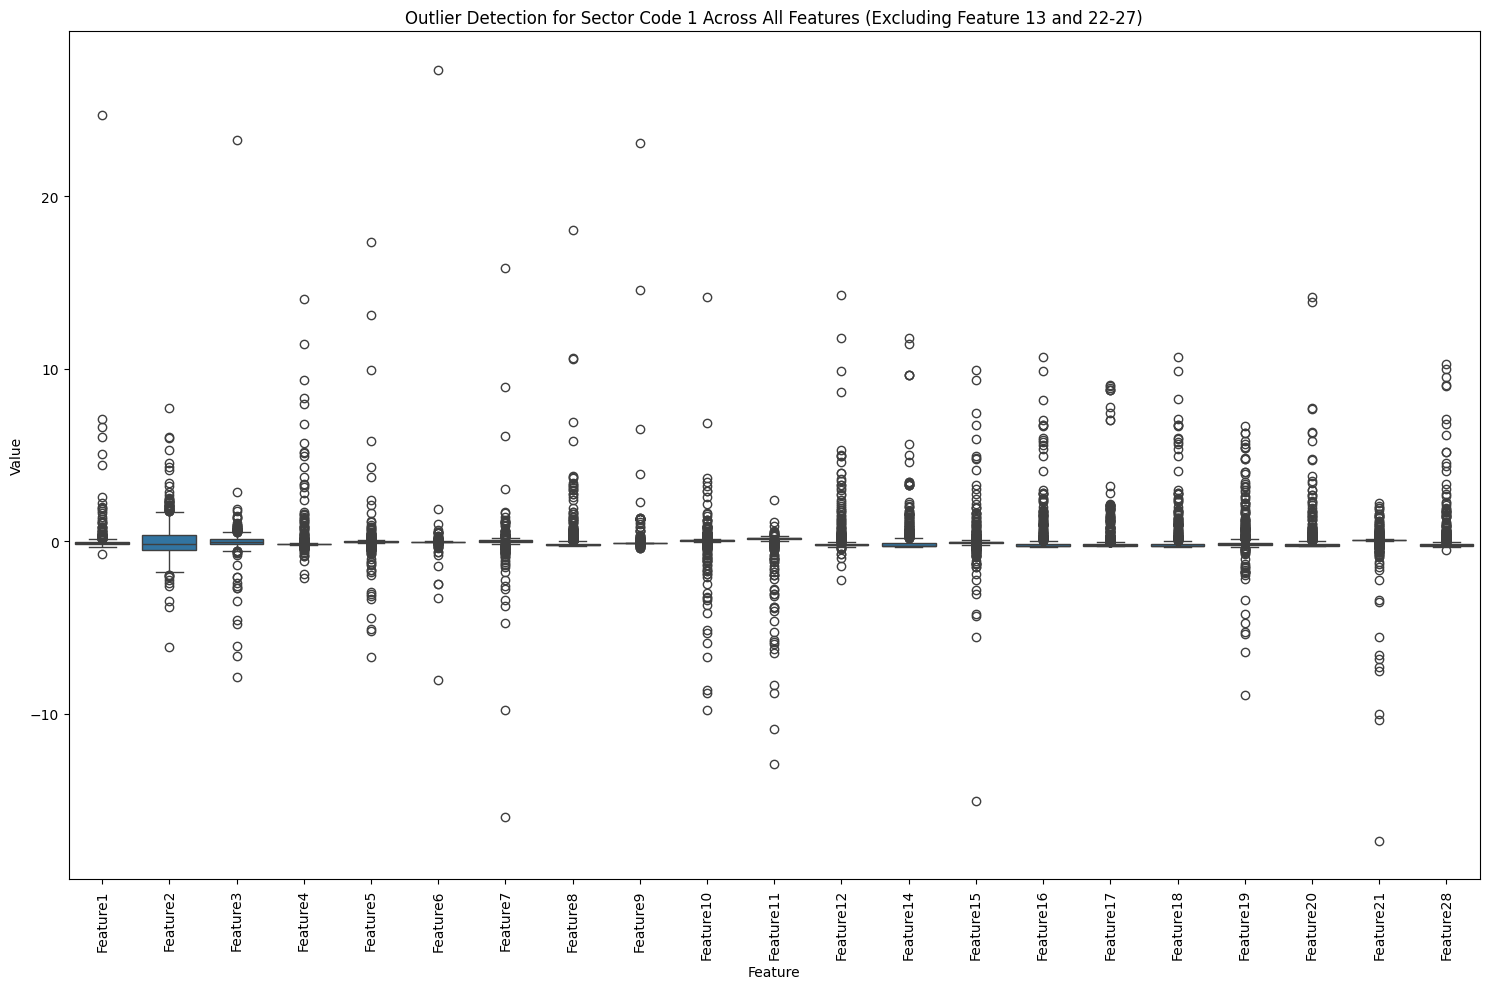

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for sector_code == 1
df_sector_1 = df_normalized[df_normalized['sector_code'] == 1.0]

# Define the features to exclude (string format)
excluded_features = [f'Feature{i}' for i in [13] + list(range(23, 28))]

# Generate the list of features to plot
value_vars = [f'Feature{i}' for i in range(1, 29) if f'Feature{i}' not in excluded_features]

# Melt the dataset for seaborn
df_melted = df_sector_1.melt(id_vars=['sector_code'], value_vars=value_vars,
                             var_name='Feature', value_name='Value')

# Create the boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)

# Adjusting the plot for better readability
plt.xticks(rotation=90)
plt.title('Outlier Detection for Sector Code 1 Across All Features (Excluding Feature 13 and 22-27)')
plt.tight_layout()
plt.show()


In [37]:
df = df_normalized
# Assuming your dataset is a pandas DataFrame 'df' with 'sector_code' and features
sector_codes = df['sector_code'].unique()

# Define features excluding Feature13 and Feature22 to Feature27
feature_list = [f'Feature{i}' for i in range(1, 29) if i != 13 and not (23 <= i <= 27)]

# Loop through each sector
for sector in sector_codes:
    df_sector = df[df['sector_code'] == sector]

    for feature in feature_list:
        lower_limit = df_sector[feature].quantile(0.01)
        upper_limit = df_sector[feature].quantile(0.99)

        # Apply capping
        df.loc[df['sector_code'] == sector, feature] = df.loc[df['sector_code'] == sector, feature].clip(lower=lower_limit, upper=upper_limit)

# Now the DataFrame `df` has capped values for selected features, sector-wise.


In [38]:
df.columns = df.columns.str.strip()
# One-hot encode sector_code into 0s and 1s
sector_dummies = pd.get_dummies(df['sector_code'], prefix='sector')

# Drop the original sector_code column
df_new = df.drop(columns=['sector_code'])

# Concatenate the one-hot encoded sector columns
df_new = pd.concat([df_new, sector_dummies], axis=1)

# Move target1, target2, target3 to the end
target_cols = ['Target 1' , 'Target 2', 'Target 3']
targets = df_new[target_cols]
df_new = df_new.drop(columns=target_cols)
df_new = pd.concat([df_new, targets], axis=1)


In [39]:
df_new.columns = df_new.columns.map(lambda x: x.removesuffix('.0'))
sector_cols = [f'sector_{i}' for i in range(1, 13)]
df_new[sector_cols] = df_new[sector_cols].astype(int)

In [40]:
df1 = df_new.drop(columns=['Target 2','Target 3'])
df2 = df_new.drop(columns=['Target 1','Target 3'])
df3 = df_new.drop(columns=['Target 1','Target 2'])

In [41]:
df1 = df1[~(df1['Target 1'].isna() & (df1['Year'] <= 2023))].copy()
df2 = df2[~(df2['Target 2'].isna() & (df2['Year'] <= 2022))].copy()
df3 = df3[~(df3['Target 3'].isna() & (df3['Year'] <= 2021))].copy()

In [42]:
df1.to_csv('FidelFolio_df1.csv')
df2.to_csv('FidelFolio_df2.csv')
df3.to_csv('FidelFolio_df3.csv')